In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [35]:
# Display plots inline
%matplotlib inline

In [36]:
# Load the data
data = pd.read_csv("kc_house_data.csv")

In [37]:
# Display the first few rows and summary statistics
print(data.head())
print(data.describe())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

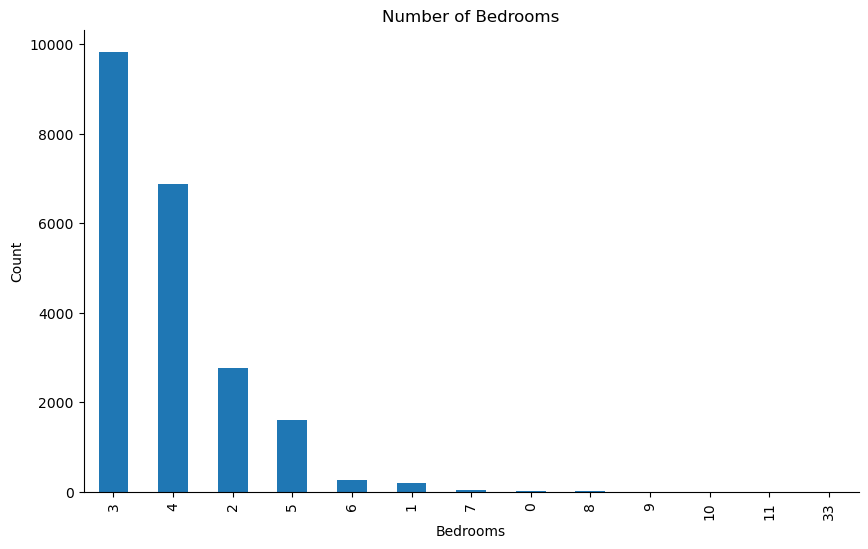

In [38]:
# Data Visualization
# Number of bedrooms
plt.figure(figsize=(10, 6))
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine()
plt.show()

C:\Users\thabu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thabu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x1000 with 0 Axes>

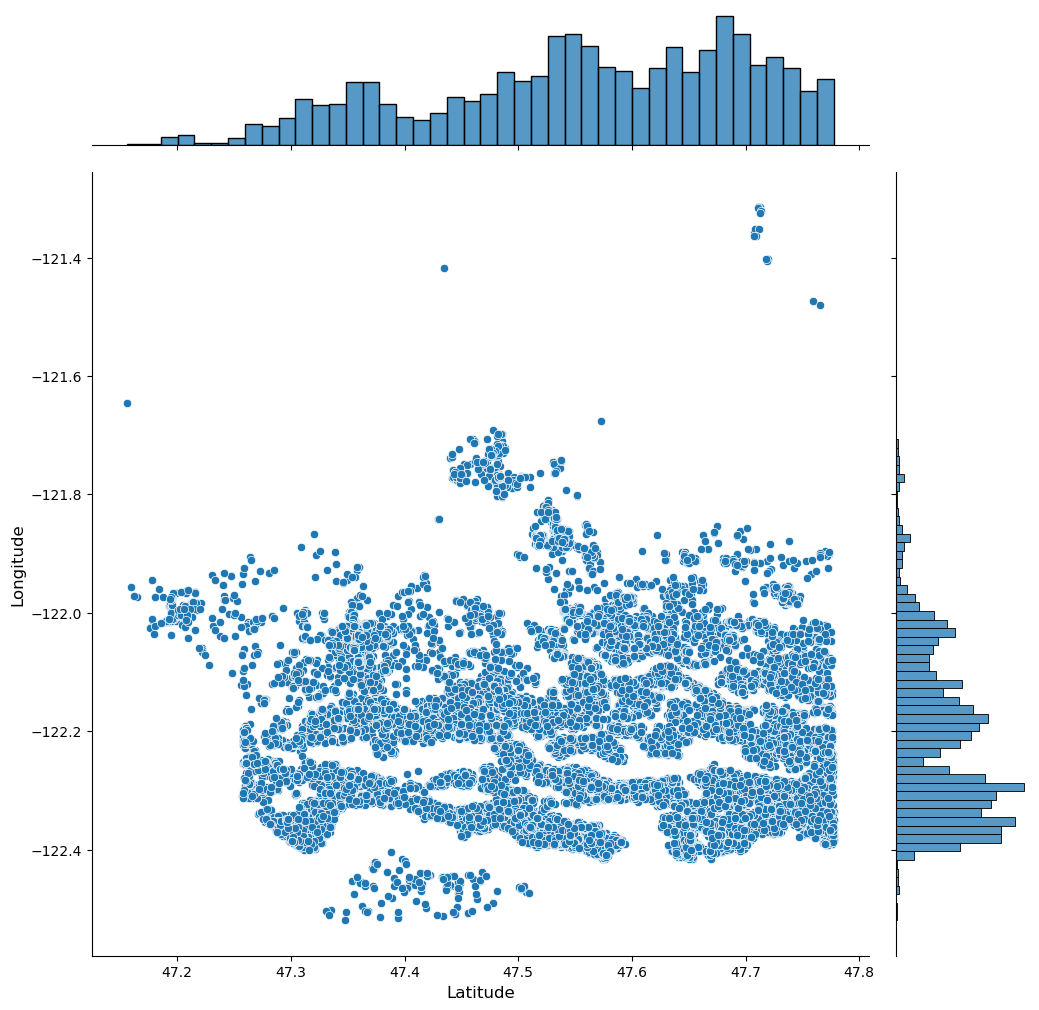

In [39]:
# Jointplot for latitude and longitude
plt.figure(figsize=(10, 10))
sns.jointplot(x=data.lat.values, y=data.long.values, height=10)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Longitude', fontsize=12)
plt.show()

In [40]:
# Scatter plots
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0, 0.5, 'Square Feet')

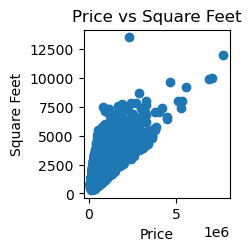

In [41]:
plt.subplot(2, 3, 1)
plt.scatter(data.price, data.sqft_living)
plt.title("Price vs Square Feet")
plt.xlabel("Price")
plt.ylabel("Square Feet")

Text(0, 0.5, 'Longitude')

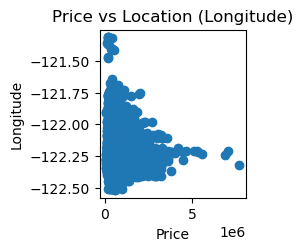

In [42]:
plt.subplot(2, 3, 2)
plt.scatter(data.price, data.long)
plt.title("Price vs Location (Longitude)")
plt.xlabel("Price")
plt.ylabel("Longitude")

Text(0, 0.5, 'Latitude')

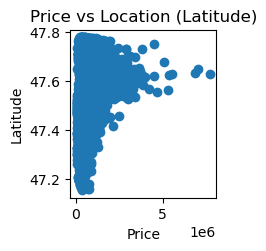

In [43]:
plt.subplot(2, 3, 3)
plt.scatter(data.price, data.lat)
plt.title("Price vs Location (Latitude)")
plt.xlabel("Price")
plt.ylabel("Latitude")

Text(0, 0.5, 'Price')

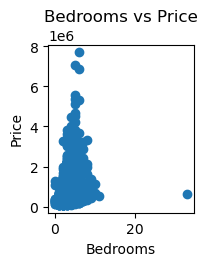

In [44]:
plt.subplot(2, 3, 4)
plt.scatter(data.bedrooms, data.price)
plt.title("Bedrooms vs Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

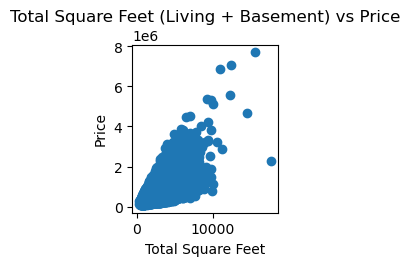

In [45]:
plt.subplot(2, 3, 5)
plt.scatter((data['sqft_living'] + data['sqft_basement']), data['price'])
plt.title("Total Square Feet (Living + Basement) vs Price")
plt.xlabel("Total Square Feet")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

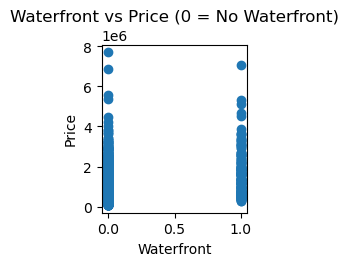

In [46]:
plt.subplot(2, 3, 6)
plt.scatter(data.waterfront, data.price)
plt.title("Waterfront vs Price (0 = No Waterfront)")
plt.xlabel("Waterfront")
plt.ylabel("Price")

In [47]:
plt.tight_layout()
sns.despine()
plt.show()

<Figure size 640x480 with 0 Axes>

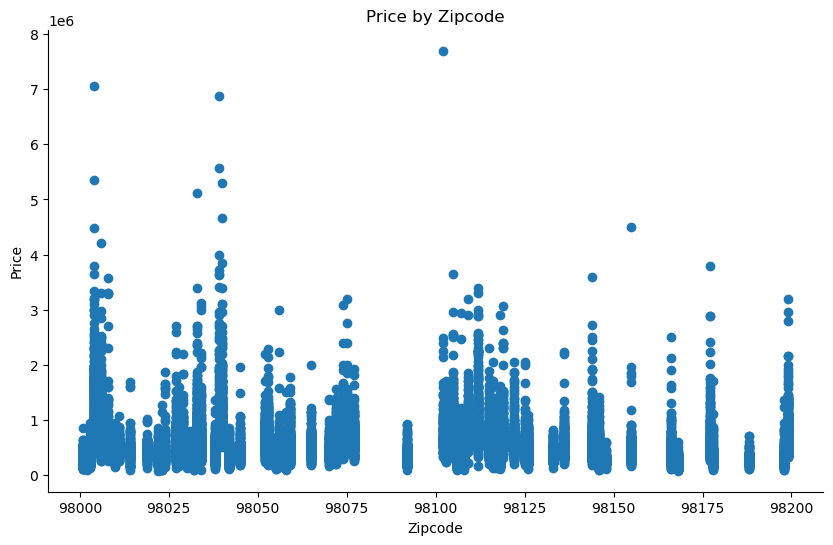

In [48]:
# Price by zip code
plt.figure(figsize=(10, 6))
plt.scatter(data.zipcode, data.price)
plt.title("Price by Zipcode")
plt.xlabel("Zipcode")
plt.ylabel("Price")
sns.despine()
plt.show()

In [49]:
# Machine Learning

# Data preparation
labels = data['price']
data['date'] = pd.to_datetime(data['date']).dt.year
train1 = data.drop(['id', 'price'], axis=1)

In [50]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size=0.10, random_state=42)

In [51]:
# Linear Regression
reg = LinearRegression()
reg.fit(x_train, y_train)
print("Linear Regression score:", reg.score(x_test, y_test))

Linear Regression score: 0.6921661564233637


In [52]:
# Gradient Boosting Regressor
clf = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2,learning_rate=0.1, loss='squared_error', random_state=42)
clf.fit(x_train, y_train)
print("Gradient Boosting Regressor score:", clf.score(x_test, y_test))

Gradient Boosting Regressor score: 0.9018065512486961


In [53]:
# Plotting training deviance
n_estimators = clf.n_estimators
test_score = np.zeros((n_estimators,), dtype=np.float64)

In [54]:
# Fit the model to the training data
clf.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400, random_state=42)

In [55]:
# Evaluate the model
score = clf.score(x_test, y_test)
print("Gradient Boosting Regressor score:", score)

Gradient Boosting Regressor score: 0.9018065512486961


In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
# Calculate and print the Mean Squared Error
y_pred = clf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 14304731990.769266


In [58]:
# Optionally, plot the training deviance
n_estimators = clf.n_estimators
test_score = np.zeros((n_estimators,), dtype=np.float64)

In [59]:
for i, y_pred in enumerate(clf.staged_predict(x_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

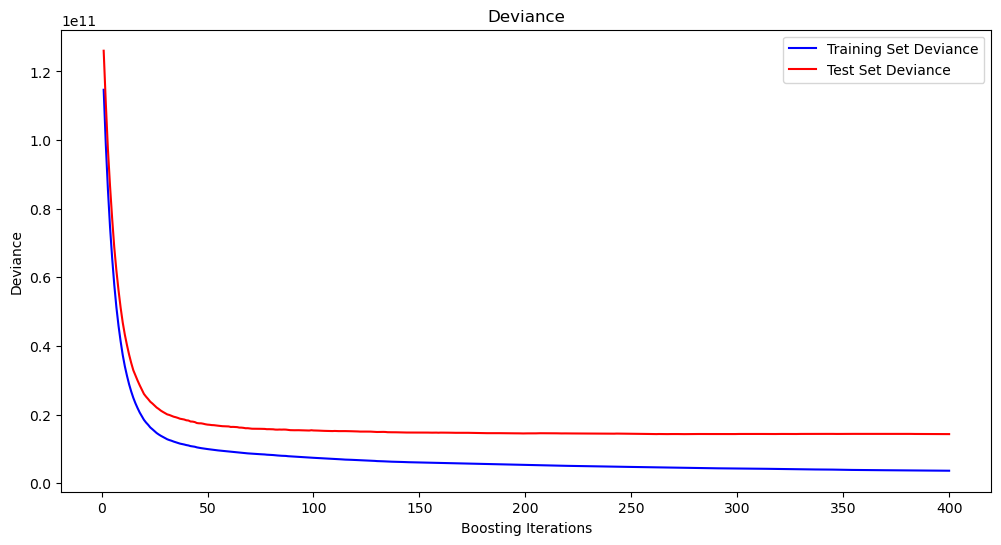

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(n_estimators) + 1, clf.train_score_, 'b-', label='Training Set Deviance')
plt.plot(np.arange(n_estimators) + 1, test_score, 'r-', label='Test Set Deviance')
plt.title("Deviance")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
plt.legend(loc='upper right')
plt.show()

In [61]:
# PCA
pca = PCA()
pca.fit_transform(scale(train1))

array([[-2.63912921e+00, -2.21508289e-02, -3.19945945e-01, ...,
        -5.09379503e-01,  8.02082527e-02,  7.59783220e-16],
       [-2.25243801e-01,  1.70747997e+00, -7.64319282e-01, ...,
         1.85789179e-01, -9.81019712e-01, -2.22908158e-15],
       [-2.58818707e+00, -6.60887167e-01,  3.55764123e-01, ...,
         1.42737049e+00,  1.37321751e-01, -1.74593616e-15],
       ...,
       [-2.41120579e+00, -1.07548669e+00, -1.46683720e+00, ...,
        -6.95606695e-01, -9.66169827e-01,  3.17916242e-16],
       [ 3.13655998e-01, -1.92761669e+00, -1.03805358e+00, ...,
        -4.31441606e-01,  3.96116122e-01,  1.42578133e-15],
       [-2.42314973e+00, -1.06026237e+00, -1.47637686e+00, ...,
        -6.95275385e-01, -9.53057601e-01,  3.09384789e-16]])